# Case study form 8K filings

Given the impressions from the last chapter, we want to examine the relation between textual information and stock market reactions a little further. Entities which issue securities must file with the US Securities and Exchange Commission (SEC). A full list of all forms can be found [here](https://www.sec.gov/forms), however, for stock market companies, common filings are of form 4, 8K, 10Q and 10K. Form 4 filings need to be filed by directors, officers and owners holding more than 10\% of a company's shares. Form 4 filings include statements of ownerships and inform the public about ownership changes which could rely upon insider information. These filings usually do not include a large amount of textual information. 

Besides, 10Q and 10K form filings are quarterly and annual reports which are filed on a regular basis and include a large amount of textual information. If events occur which should be announced to the shareholders of the company between quarterly and annual reports, 8K forms must be filed. These filings usually are shorter than 10Q and 10K filings, however, due to their ad-hoc nature, they may cause the largest stock market reactions. This is why we are going to focus on form 8K filings and corresponding stock market reactions in this case study.

## Form 8K filings

The events which trigger the need for form 8K filings are defined by so items which are ascribed to different sections.

* Section: Registrant's Business and Operations
    * Item 1.01: Entry into a Material Definitive Agreement
    * Item 1.02: Termination of a Material Definitive Agreement
    * Item 1.03: Bankruptcy or Receivership
    * Item 1.04: Mine Safety - Reporting of Shutdowns and Patterns of Violations
* Section: Financial Information
    * Item 2.01: Completion of Acquisition or Disposition of Assets
    * Item 2.02: Results of Operations and Financial Condition
    * Item 2.03: Creation of a Direct Financial Obligation or an Obligation under an Off-Balance Sheet Arrangement of a Registrant
    * Item 2.04: Triggering Events That Accelerate or Increase a Direct Financial Obligation or an Obligation under an Off-Balance Sheet Arrangement
    * Item 2.05: Costs Associated with Exit or Disposal Activities
    * Item 2.06: Material Impairments
* Section: Securities and Trading Markets
    * Item 3.01: Notice of Delisting or Failure to Satisfy a Continued Listing Rule or Standard; Transfer of Listing
    * Item 3.02: Unregistered Sales of Equity Securities
    * Item 3.03: Material Modification to Rights of Security Holders
* Section: Matters Related to Accountants and Financial Statements
    * Item 4.01: Changes in Registrant's Certifying Accountant
    * Item 4.02: Non-Reliance on Previously Issued Financial Statements or a Related Audit Report or Completed Interim Review
* Section: Corporate Governance and Management
    * Item 5.01: Changes in Control of Registrant
    * Item 5.02: Departure of Directors or Certain Officers; Election of Directors; Appointment of Certain Officers; Compensatory Arrangements of Certain Officers
    * Item 5.03: Amendments to Articles of Incorporation or Bylaws; Change in Fiscal Year
    * Item 5.04: Temporary Suspension of Trading Under Registrant's Employee Benefit Plans
    * Item 5.05: Amendment to Registrant's Code of Ethics, or Waiver of a Provision of the Code of Ethics
    * Item 5.06: Change in Shell Company Status
    * Item 5.07: Submission of Matters to a Vote of Security Holders
    * Item 5.08: Shareholder Director Nominations
* Section: Asset-Backed Securities
    * Item 6.01: ABS Informational and Computational Material
    * Item 6.02: Change of Servicer or Trustee
    * Item 6.03: Change in Credit Enhancement or Other External Support
    * Item 6.04: Failure to Make a Required Distribution
    * Item 6.05: Securities Act Updating Disclosure
* Section: Regulation FD
    * Item 7.01: Regulation FD Disclosure
* Section: Other Events
    * Item 8.01: Other Events (The registrant can use this Item to report events that are not specifically called for by Form 8-K, that the registrant considers to be of importance to security holders.)
* Section: Financial Statements and Exhibits
    * Item 9.01: Financial Statements and Exhibits

Companies usually must submit the filing to the SEC within four business days. Details on how to read these filings are provided [here](https://www.sec.gov/investor/pubs/readan8k.pdf). Each filing can contain more than one time at the same time. Besides plain form 8K filings, companies can append further information by adding exhibits to the filing. Common examples are press release statements.

The cell below shows item occurrences for all 8K filings by Apple since 2004. We observe that Financial Statements and Exhibits (Item 9.01) as well as Results of Operations and Financial Condition (2.02) are the most common items. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/apple_filing_types_full.csv")
form_8k_filing = df[df.form == "8-K"]
items_sep =form_8k_filing["items"].apply(lambda x: x.split(",")).tolist()

items_all = []
for item in items_sep:
    for i in item:
        items_all.append(i)

item_type, num_filings = np.unique(np.array(items_all), return_counts=True)
aapl_8k_items = pd.DataFrame(dict(item_type = item_type, num_filings = num_filings))
aapl_8k_items.sort_values(by = "num_filings", ascending=False).set_index("item_type")

,num_filings
item_type,
9.01,136
2.02,83
8.01,41
5.02,31
5.03,14
5.07,14
1.01,6
7.01,5
12,3


## Financial sentiment in form 8K filings

The aim of this case study is to identify financial sentiment in 8K filings, and, if a correlation between this sentiment and corresponding stock market reactions exist. We make use of Apple's 8K filings in this notebook. Below you see the input of our dataset for this example. It contains the filing as well as report date, items, the 8K filings, and, if present the extension of the filing. 

In [2]:
import pandas as pd

aapl_8ks = pd.read_csv("../data/aapl_8k_reports_and_extensions.csv")
aapl_8ks.head()

,filingDate,reportDate,items,report,extension991
0,2023-11-02,2023-11-02,"2.02,9.01",8-K 1 aapl-20231102.htm 8-K aapl-20231102false...,EX-99.1 2 a8-kex991q4202309302023.htm EX-99.1 ...
1,2023-08-03,2023-08-03,"2.02,9.01",8-K 1 aapl-20230803.htm 8-K aapl-20230803false...,EX-99.1 2 a8-kex991q3202307012023.htm EX-99.1 ...
2,2023-05-10,2023-05-08,"8.01,9.01",8-K 1 ny20007635x4_8k.htm 8-K truetruetruetrue...,NaN
3,2023-05-04,2023-05-04,"2.02,9.01",8-K 1 aapl-20230504.htm 8-K aapl-20230504false...,EX-99.1 2 a8-kex991q2202304012023.htm EX-99.1 ...
4,2023-03-10,2023-03-10,5.07,8-K 1 brhc10049413_8k.htm 8-K truetruetruetrue...,NaN


If we want to examine the sentiment in these filings with a Bert-type model, FinBert seems to be a natural choice as it has been trained and fine-tuned to identify the tone of domain specific language used on financial markets. As the Bert model, it can has been trained with a maximum sequence lenght of 512 tokens. So, in a first step, let us examine the number of tokens in 8K filings and their extensions. 

/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/DLTA/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


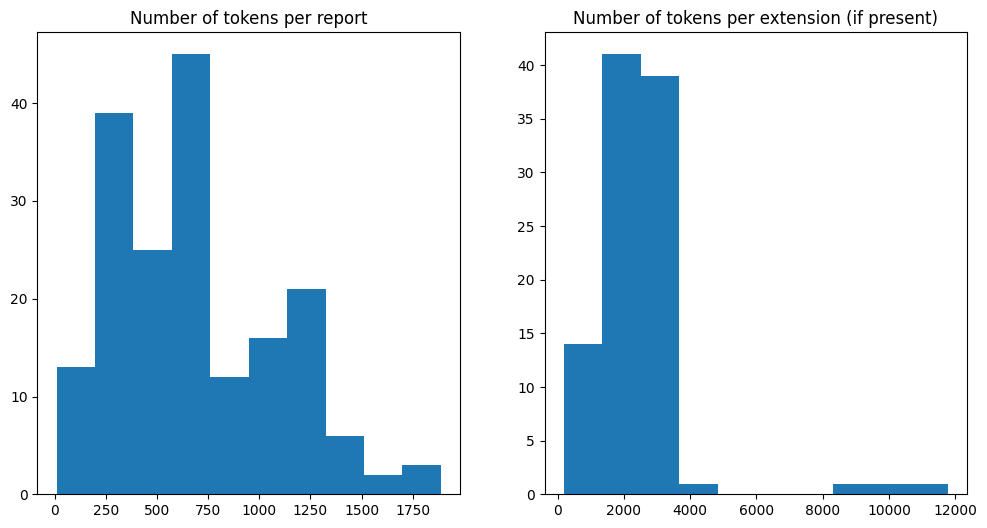

In [3]:
from transformers import BertTokenizer
import matplotlib.pylab as plt


tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")
reports = [report for report in aapl_8ks.report if not(pd.isnull(report))]
tokenized_8k_reports = tokenizer(reports)
extensions = [extension for extension in aapl_8ks.extension991 if not(pd.isnull(extension))]
tokenized_extensions = tokenizer(extensions)
report_lengths = [sum(att_mask) for att_mask in tokenized_8k_reports.attention_mask]
extension_lengths = [sum(att_mask) for att_mask in tokenized_extensions.attention_mask]

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs[0].hist(report_lengths)
axs[0].set_title("Number of tokens per report")
axs[1].hist(extension_lengths)
axs[1].set_title("Number of tokens per extension (if present)")
plt.show()

We observe that it seems not to be an option to process reports nor their extension as a single text sequence. Both text types include far more than 512 tokens and we would loose a lot of information by simply truncating these text sequences. Thus, as an alternative, we split each report into sentence and identify the sentiment of each sentence first. Once this is done, we aggregate the list of labeled sentences by:

$$
\frac{s^{pos} - s^{neg}}{s^{pos} + s^{neg}}
$$

where $s^{pos}, s^{neg}$ are sentences which are labeled as positive and negative, respectively. If all sentences are labeled to have a neutral financial tone, we set the value to zero. 

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


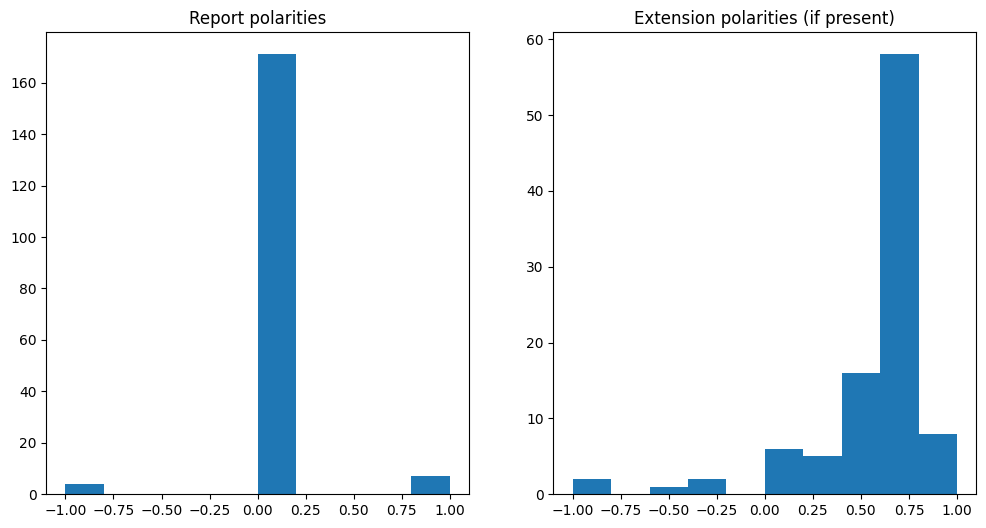

In [4]:
from transformers import pipeline
import nltk.data
import numpy as np
import os
import matplotlib.pylab as plt


# a function to filter out sentences with less than five white space separated tokens
def nbr_ws_tokens(sentence):
    if len(sentence.split(" ")) > 5:
        return True
    else:
        return False

# a function to summarize financial sentiments of all sentences found in a report
def finbert_polarity(sentiment_labels):
    finbert_polarity = {}
    labels, counts = np.unique(sentiment_labels, return_counts = True)

    for label, count in zip(labels, counts):
        finbert_polarity[label] = count

    finbert_keys = list(finbert_polarity.keys())

    if "Positive" in finbert_keys:
        num_positives = finbert_polarity["Positive"]
    else:
        num_positives = 0

    if "Negative" in finbert_keys:
        num_negatives = finbert_polarity["Negative"]
    else:
        num_negatives = 0

    if (num_positives == 0) and (num_negatives == 0):
        final_score = 0
    else:
        final_score = (num_positives - num_negatives) / (num_positives + num_negatives)

    return final_score

# define the Bert model for labeling the sentences
fin_sentiment = pipeline("text-classification", tokenizer = "yiyanghkust/finbert-tone", model = "yiyanghkust/finbert-tone")
# the sentence split model
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

if 'aapl_8k_reports_and_extensions_w_polarities.csv' in os.listdir("../data/"):
    aapl_8ks = pd.read_csv("../data/aapl_8k_reports_and_extensions_w_polarities.csv")
else:
    aapl_8ks.loc[:, "report_polarities"] = pd.NA
    aapl_8ks.loc[:, "extension_polarities"] = pd.NA
    for idx, row in tqdm(aapl_8ks.iterrows()):
        try:
            if not(pd.isnull(row.report)):
                report_sentences = sent_detector.tokenize(row.report)
                report_sentences = list(filter(nbr_ws_tokens, report_sentences))
                max_length = min(max([len(sentence.split(" ")) for sentence in report_sentences]), 512)
                sentiments = fin_sentiment(report_sentences, padding = "max_length", max_length = max_length, truncation = True)
                sentiment_labels = [sentiment["label"] for sentiment in sentiments]
                sentiment_scores = [sentiment["score"] for sentiment in sentiments]
                aapl_8ks.loc[idx, "report_polarities"] = finbert_polarity(sentiment_labels)
            if not(pd.isnull(row.extension991)):
                report_sentences = sent_detector.tokenize(row.extension991)
                report_sentences = list(filter(nbr_ws_tokens, report_sentences))
                max_length = min(max([len(sentence.split(" ")) for sentence in report_sentences]), 512)
                sentiments = fin_sentiment(report_sentences, padding = "max_length", max_length = max_length, truncation = True)
                sentiment_labels = [sentiment["label"] for sentiment in sentiments]
                sentiment_scores = [sentiment["score"] for sentiment in sentiments]
                aapl_8ks.loc[idx, "extension_polarities"] = finbert_polarity(sentiment_labels)
        except:
            print(idx)
    aapl_8ks.to_csv("../data/aapl_8k_reports_and_extensions_w_polarities.csv", index = False)


fig, axs = plt.subplots(1, 2, figsize = (12, 6))

axs[0].hist([pol for pol in aapl_8ks.report_polarities if not(pol is pd.NA)])
axs[0].set_title("Report polarities")
axs[1].hist([pol for pol in aapl_8ks.extension_polarities if not(pol is pd.NA)])
axs[1].set_title("Extension polarities (if present)")
plt.show()

The historgrams above exhibit aggregated financial sentiment which is derived as described before. We observe that 8-K filings themselves seem to be written in a very neutral tone. However, exhibhts are characterized by very positive tone. It can not be stated with certainty if this observation is impacted by a potential positive bias the FinBert model may have or it is simply based on the fact that Apple is a successful company which is more likely to share positive statements about their development. To examine this in a little more detail, we contrast these measures by the dictionary based polarity approach as described in Chapter 2, hereby, using the Loughrain and McDonald (2011) dictionary. The cellse below show that we can not find a similar positive bias. At the same time, the correlation between FinBert and Loughrain/McDonald sentiment is relatively high for exhibits. 

In [5]:
import pysentiment2 as ps

lm = ps.LM()

report_polarities = []
extension_polarities = []

for idx, row in aapl_8ks.iterrows():
    if not(pd.isnull(row.report)):
        lm_tokens_report = lm.tokenize(row.report)
        lm_score_report = lm.get_score(lm_tokens_report)
        report_polarities.append(lm_score_report["Polarity"])
    else:
        report_polarities.append(pd.NA)
    if not(pd.isnull(row.extension991)):
        lm_tokens_extension = lm.tokenize(row.extension991)
        lm_score_extension = lm.get_score(lm_tokens_extension)
        extension_polarities.append(lm_score_extension["Polarity"])
    else:
        extension_polarities.append(pd.NA)

aapl_8ks.loc[:, "report_polarities_lm"] = report_polarities
aapl_8ks.loc[:, "extension_polarities_lm"] = extension_polarities

In [6]:
aapl_8ks.loc[:, ["report_polarities", "report_polarities_lm"]].dropna().corr()

,report_polarities,report_polarities_lm
report_polarities,1.000000,0.133629
report_polarities_lm,0.133629,1.000000


In [7]:
aapl_8ks.loc[:, ["extension_polarities", "extension_polarities_lm"]].dropna().corr()

,extension_polarities,extension_polarities_lm
extension_polarities,1.000000,0.674941
extension_polarities_lm,0.674941,1.000000


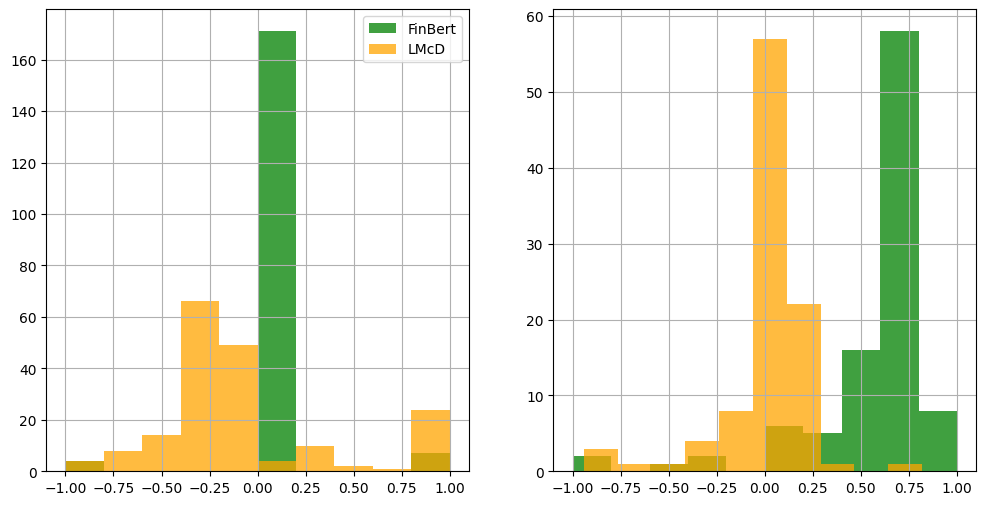

In [8]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
aapl_8ks.loc[: , "report_polarities"].hist(ax = axs[0], color = "green", alpha = 0.75, label = "FinBert")
aapl_8ks.loc[: , "report_polarities_lm"].hist(ax = axs[0], color = "orange", alpha = 0.75, label = "LMcD")
aapl_8ks.loc[: , "extension_polarities"].hist(ax = axs[1], color = "green", alpha = 0.75)
aapl_8ks.loc[: , "extension_polarities_lm"].hist(ax = axs[1], color = "orange", alpha = 0.75)
axs[0].legend()

As describe in the previous chapter, we want to examine the relationship between polarity in each report and exhibit and the cumulative abnormal return. This time, we use the Fama/French three factor model to determine Apple's abnormal returns. The cells below show positive correlation between FinBert polarity scores and cumulative abnormal returns. At the same time Loughrain/McDonald polarity and cumulative abnormal returns is close to zero and slightly negative. The latter does not seem to be in line with economic intuition. We would expect that postive statements by the company should trigger positive stock market reactions. 

In [9]:
import yfinance as yf
import pandas as pd
from utils import get_ff_factors

try:
    aapl_returns = pd.read_csv("../data/aapl_polarity_case_study.csv", index_col = "Date")
    aapl_returns.index = pd.to_datetime(aapl_returns.index)
except:
    aapl_stock_data = yf.download(tickers = "AAPL", start = "2003-01-01", end = "2023-12-31")
    aapl_stock_data = aapl_stock_data.loc[:, ["Adj Close"]]
    aapl_returns = aapl_stock_data.pct_change().dropna()
    aapl_returns.columns = ["r_t"]
    aapl_returns = aapl_stock_data.pct_change().dropna()

df_ff = get_ff_factors()
df_ff3 = aapl_returns.merge(df_ff, left_index = True, right_index = True)
df_ff3.head()

,r_t,Mkt-RF,SMB,HML,RF
2003-01-03,0.006754,-0.0011,-0.0047,0.0015,0.00005
2003-01-06,0.000000,0.0213,-0.0056,-0.0042,0.00005
2003-01-07,-0.003352,-0.0063,0.0022,-0.0012,0.00005
2003-01-08,-0.020205,-0.0134,0.0006,0.0057,0.00005
2003-01-09,0.008937,0.0189,-0.0009,-0.0043,0.00005


In [10]:
import statsmodels.api as sm
from tqdm.auto import tqdm

aapl_8ks = aapl_8ks.sort_values(by = "filingDate").reset_index(drop = True)
cars = []

for date in tqdm(aapl_8ks.filingDate):
    filing_date = pd.to_datetime(date)
    reg_start = filing_date - pd.offsets.BusinessDay(252)
    reg_end = filing_date - pd.offsets.BusinessDay(10)
    event_start = filing_date #- pd.offsets.BusinessDay(1)
    event_end = filing_date + pd.offsets.BusinessDay(1)

    X = df_ff3.loc[reg_start:reg_end, ["Mkt-RF", "SMB", "HML"]]
    X = sm.add_constant(X)
    y = df_ff3.loc[reg_start:reg_end, "r_t"].subtract(df_ff3.loc[reg_start:reg_end, "RF"])
    model = sm.OLS(y, X).fit()
    try:
        X_event = df_ff3.loc[event_start:event_end, ["Mkt-RF", "SMB", "HML"]]
        X_event = sm.add_constant(X_event)
        y_event = df_ff3.loc[event_start:event_end, "r_t"].subtract(df_ff3.loc[event_start:event_end, "RF"])
        pred_ret = model.predict(X_event)
        abnormal_returns = y_event - pred_ret
        car_t = abnormal_returns.sum()
    except:
        X_event = df_ff3.loc[event_start:event_end, ["Mkt-RF", "SMB", "HML"]]
        X_event = sm.add_constant(X_event, has_constant="add")
        y_event = df_ff3.loc[event_start:event_end, "r_t"].subtract(df_ff3.loc[event_start:event_end, "RF"])
        pred_ret = model.predict(X_event)
        abnormal_returns = y_event - pred_ret
        car_t = abnormal_returns.sum()
    cars.append(car_t)

aapl_8ks.loc[:, "car_t"] = cars
aapl_8ks.head()

100%|██████████| 186/186 [00:00<00:00, 802.65it/s]


,filingDate,reportDate,items,report,extension991,report_polarities,extension_polarities,report_polarities_lm,extension_polarities_lm,car_t
0,2004-01-14,2004-01-14,"12,7",UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,Exhibit\n99.1 Apple Reports First Quarter Resu...,0.0,0.500000,-0.6,-0.05,-0.064076
1,2004-04-14,2004-04-14,"12,7",UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,Exhibit\n99.1 Apple Reports\nSecond Quarter Re...,0.0,0.666667,-0.6,-0.095238,0.086979
2,2004-07-14,2004-07-14,"12,7",UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"Exhibit 99.1 Press Contact: June 26, September...",0.0,0.000000,-0.6,-0.8,0.139750
3,2004-10-13,2004-10-13,"2.02,9.01",UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports Fourth\nQuarter Res...,0.0,0.777778,-0.333333,0.0,0.183954
4,2005-01-11,2005-01-11,2.02,UNITED\nSTATES SECURITIES\nAND EXCHANGE COMMIS...,NaN,0.0,NaN,1.0,<NA>,-0.050481


In [11]:
aapl_8ks.loc[:, ["car_t", "report_polarities", "report_polarities_lm"]].dropna().corr()

,car_t,report_polarities,report_polarities_lm
car_t,1.000000,0.070879,-0.098293
report_polarities,0.070879,1.000000,0.133629
report_polarities_lm,-0.098293,0.133629,1.000000


In [12]:
aapl_8ks.loc[:, ["car_t", "extension_polarities", "extension_polarities_lm"]].dropna().corr()

,car_t,extension_polarities,extension_polarities_lm
car_t,1.000000,0.076400,-0.084848
extension_polarities,0.076400,1.000000,0.674941
extension_polarities_lm,-0.084848,0.674941,1.000000


Summing up, the results seem to be rather mixed. While FinBert based polarities may be exposed to a positive bias, they seem to be more correlated to intuitive stock market reactions. Taking a closer look at the results below, the positive correlation may simply come from the overall positive polarity by FinBert and a large amount of positive cumulative abnormal returns.

In [13]:
aapl_8ks.sort_values(by = "car_t", ascending=True)

,filingDate,reportDate,items,report,extension991,report_polarities,extension_polarities,report_polarities_lm,extension_polarities_lm,car_t
8,2005-04-13,2005-04-13,"2.02,9.01",UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports Second Quarter Resu...,0.0,0.833333,-0.333333,0.0,-0.114717
76,2013-01-23,2013-01-23,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports Record Results 47...,0.0,0.800000,0.0,0.081081,-0.110534
38,2008-01-22,2008-01-22,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports First Quarter Resu...,0.0,0.777778,0.0,-0.090909,-0.101054
18,2006-01-18,2006-01-18,"2.02,9.01",UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports First Quarter Resul...,0.0,0.500000,-0.333333,0.219512,-0.080860
29,2007-01-17,2007-01-17,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,Exhibit 99.1 Apple Reports First Quarter Resul...,0.0,0.777778,-0.333333,0.25,-0.078899
...,...,...,...,...,...,...,...,...,...,...
45,2009-01-21,2009-01-21,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports First Quarter Resu...,0.0,0.789474,0.0,0.0,0.103793
21,2006-07-19,2006-07-19,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE\nCOMMISS...,Exhibit 99.1 Apple\nReports Third Quarter Resu...,0.0,0.692308,-0.333333,0.172414,0.129124
43,2008-10-21,2008-10-21,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports Fourth Quarter Res...,0.0,0.789474,0.0,0.013333,0.131215
2,2004-07-14,2004-07-14,"12,7",UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"Exhibit 99.1 Press Contact: June 26, September...",0.0,0.000000,-0.6,-0.8,0.139750


In [14]:
aapl_8ks.sort_values(by = "car_t", ascending=False)

,filingDate,reportDate,items,report,extension991,report_polarities,extension_polarities,report_polarities_lm,extension_polarities_lm,car_t
3,2004-10-13,2004-10-13,"2.02,9.01",UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports Fourth\nQuarter Res...,0.0,0.777778,-0.333333,0.0,0.183954
2,2004-07-14,2004-07-14,"12,7",UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"Exhibit 99.1 Press Contact: June 26, September...",0.0,0.000000,-0.6,-0.8,0.139750
43,2008-10-21,2008-10-21,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports Fourth Quarter Res...,0.0,0.789474,0.0,0.013333,0.131215
21,2006-07-19,2006-07-19,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE\nCOMMISS...,Exhibit 99.1 Apple\nReports Third Quarter Resu...,0.0,0.692308,-0.333333,0.172414,0.129124
45,2009-01-21,2009-01-21,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports First Quarter Resu...,0.0,0.789474,0.0,0.0,0.103793
...,...,...,...,...,...,...,...,...,...,...
29,2007-01-17,2007-01-17,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,Exhibit 99.1 Apple Reports First Quarter Resul...,0.0,0.777778,-0.333333,0.25,-0.078899
18,2006-01-18,2006-01-18,"2.02,9.01",UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports First Quarter Resul...,0.0,0.500000,-0.333333,0.219512,-0.080860
38,2008-01-22,2008-01-22,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports First Quarter Resu...,0.0,0.777778,0.0,-0.090909,-0.101054
76,2013-01-23,2013-01-23,"2.02,9.01",UNITED STATES SECURITIES AND EXCHANGE COMMISS...,Exhibit 99.1 Apple Reports Record Results 47...,0.0,0.800000,0.0,0.081081,-0.110534


In [15]:
for sen in sent_detector.tokenize(aapl_8ks.sort_values(by = "car_t", ascending=False).iloc[0].extension991):
    print(sen.replace("\n", " "))

Exhibit 99.1 Apple Reports Fourth Quarter Results Revenue Increases 37 Percent Year-Over-Year iPod Shipments Top 2 million CUPERTINO, CaliforniaOctober 13, 2004Apple® today announced financial results for its fiscal 2004 fourth quarter ended September 25, 2004.
For the quarter, the Company posted a net profit of $106 million, or $.26 per diluted share.
These results compare to a net profit of $44 million, or $.12 per diluted share, in the year-ago quarter.
Revenue for the quarter was $2.35 billion, up 37 percent from the year-ago quarter.
Gross margin was 27.0 percent, up from 26.6 percent in the year-ago quarter.
International sales accounted for 37 percent of the quarters revenue.
The quarters results include an after-tax restructuring charge of $4 million.
Excluding this charge, the Companys net profit for the quarter would have been $110 million, or $.27 per diluted share.
Apple shipped 836,000 Macintosh® units and 2,016,000 iPods during the quarter, representing a 6 percent i